<a href="https://colab.research.google.com/github/Cyrus-White/HW-Project-Files-/blob/main/HW2Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

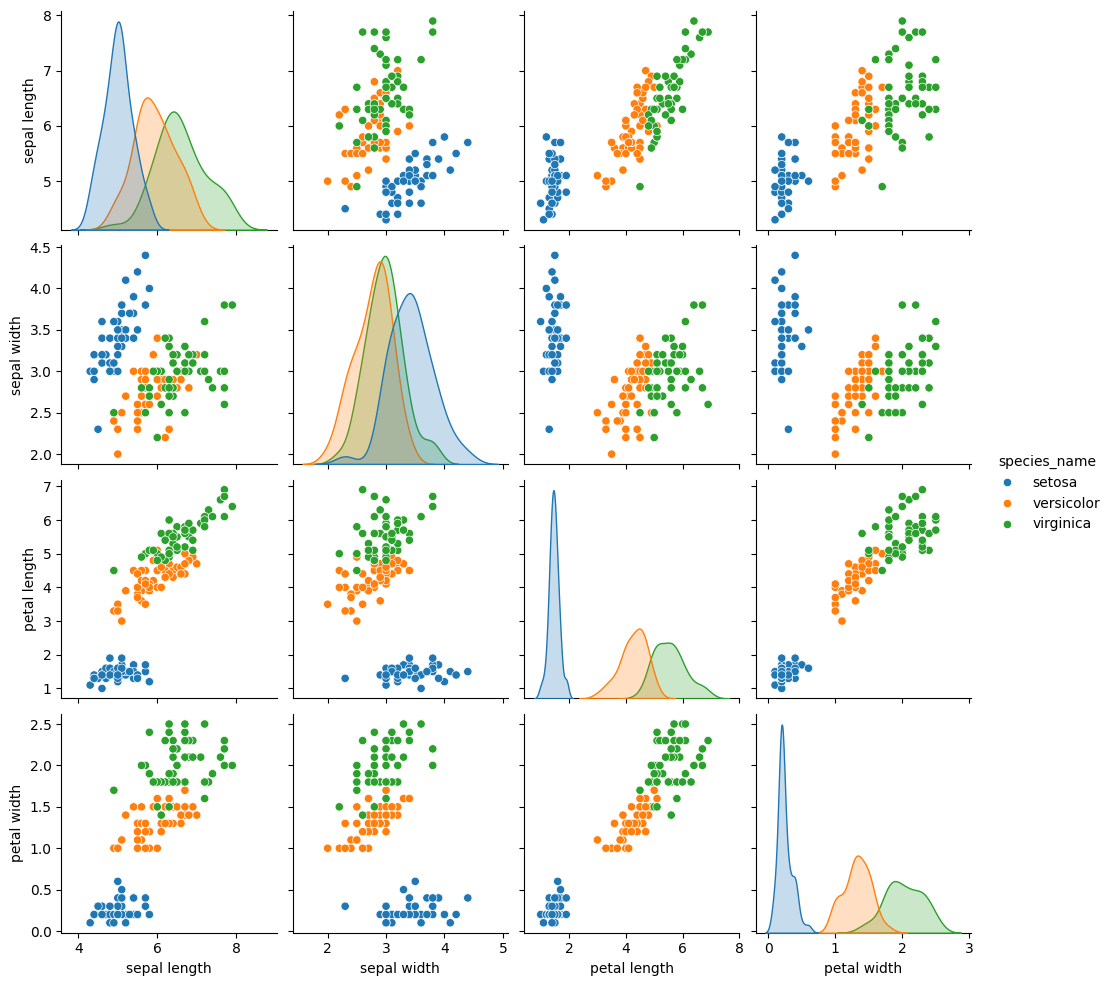

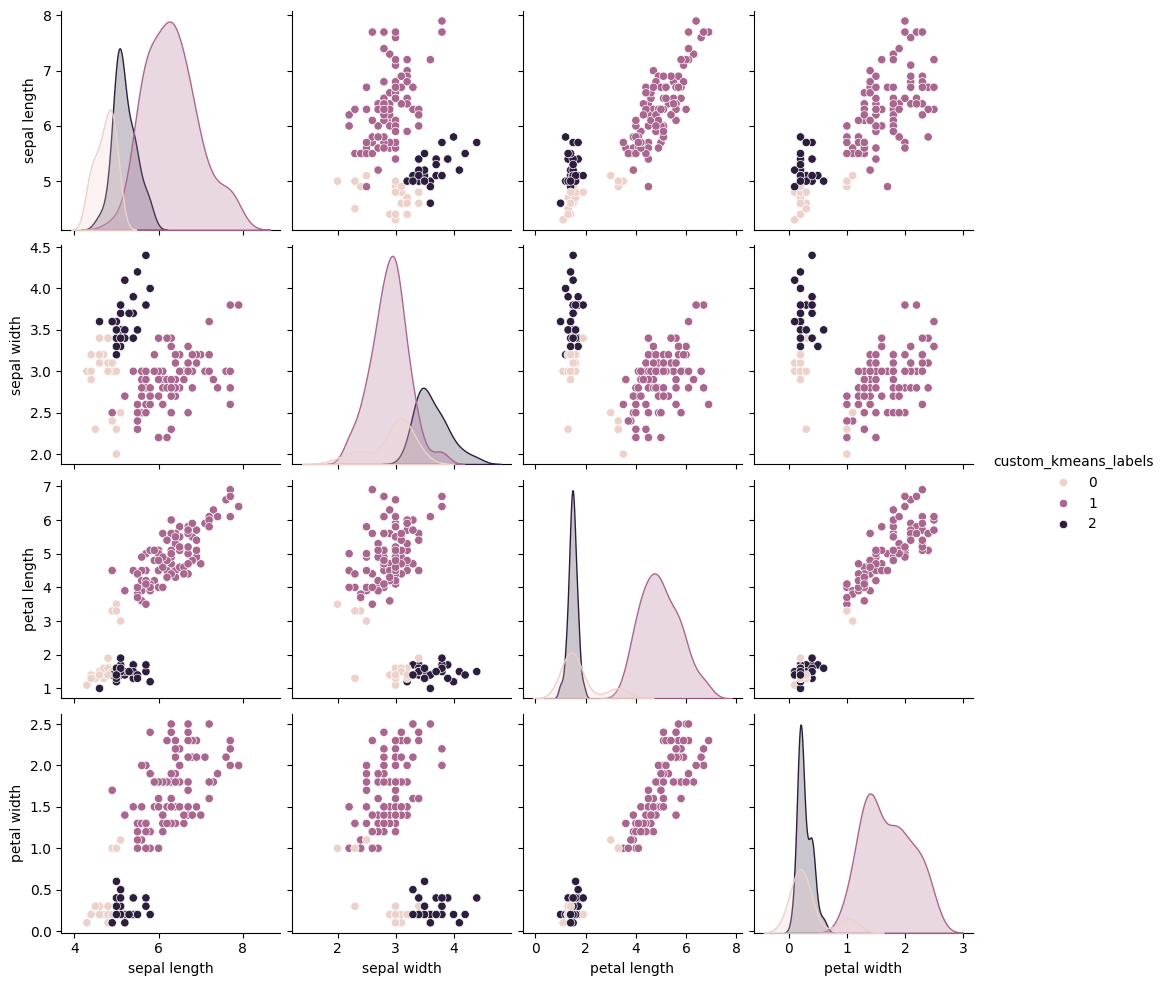

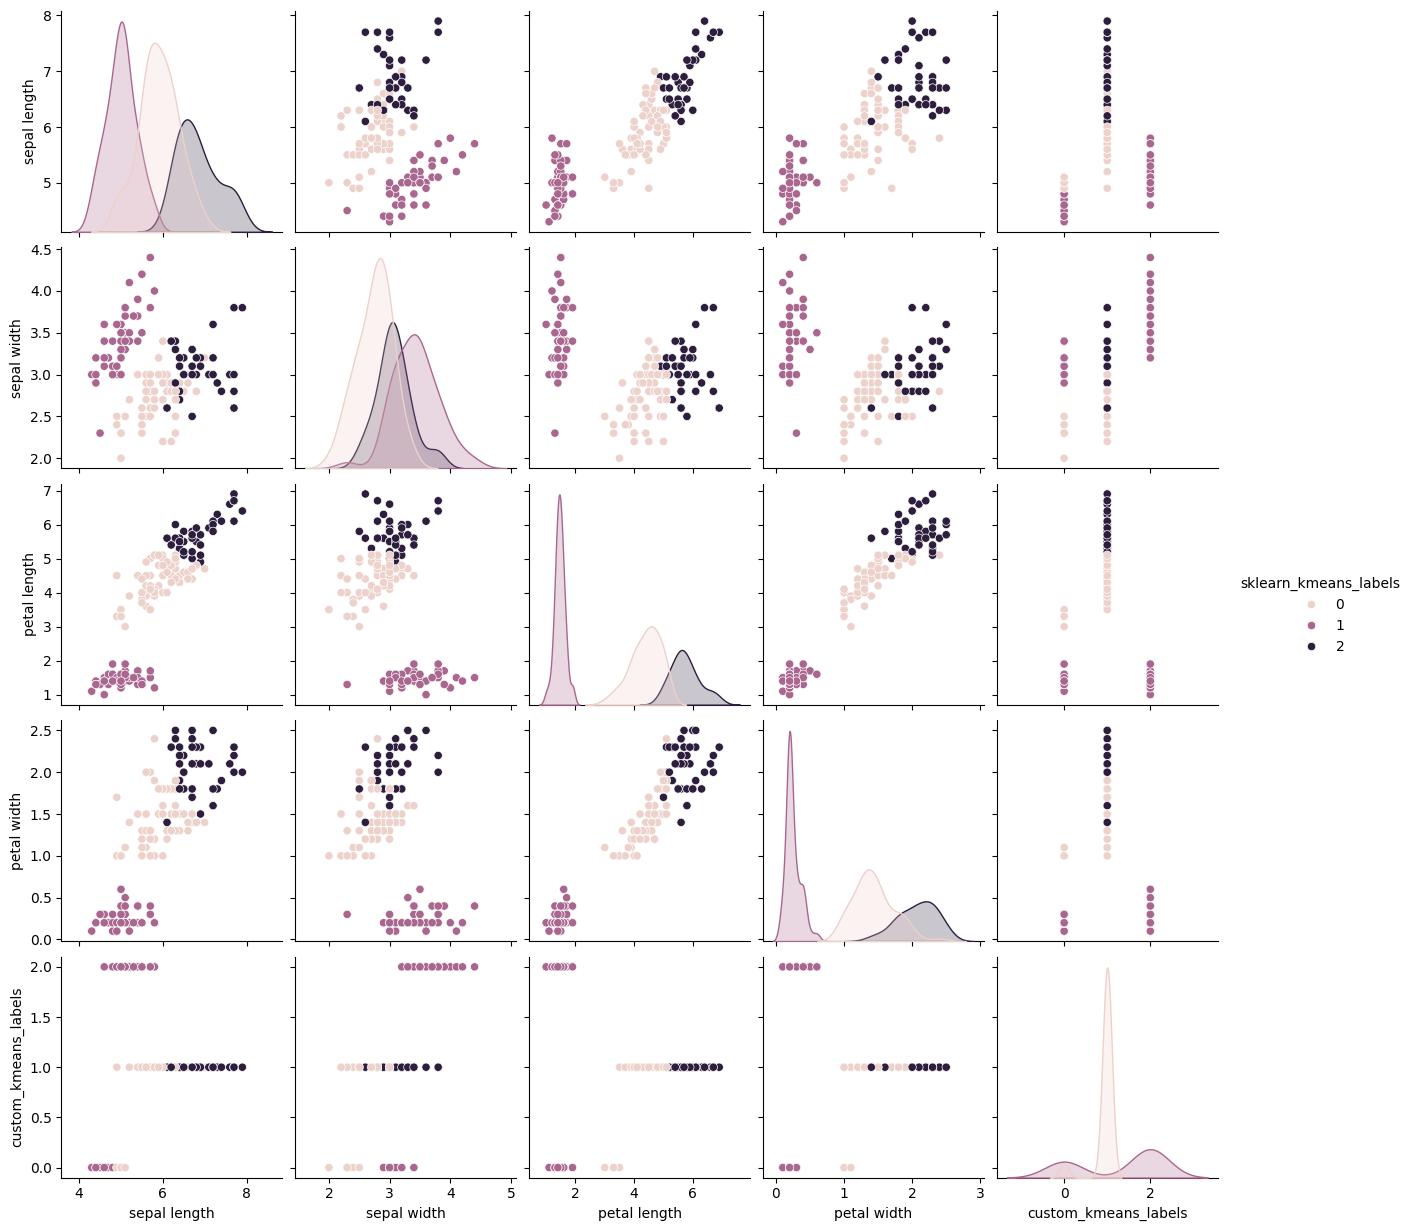

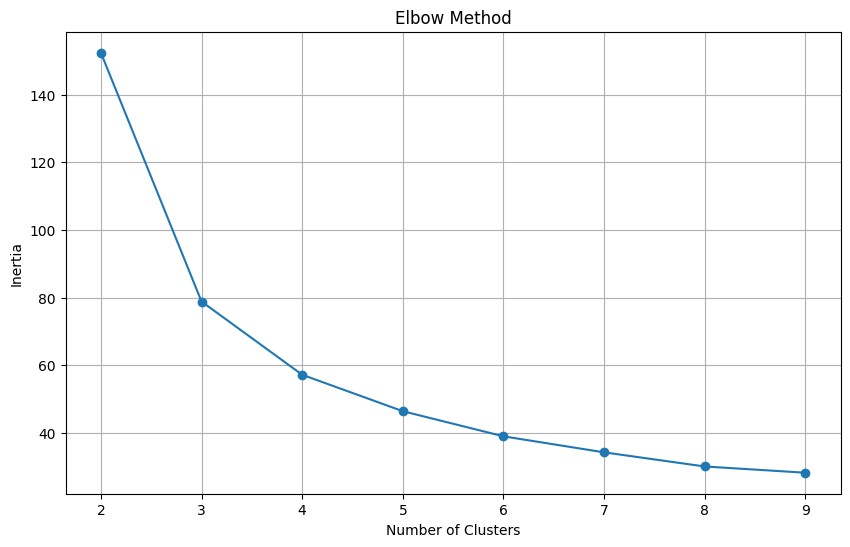

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load Iris dataset
data = load_iris()
df = pd.DataFrame()
df['sepal length'] = data['data'][:, 0]
df['sepal width'] = data['data'][:, 1]
df['petal length'] = data['data'][:, 2]
df['petal width'] = data['data'][:, 3]
df['target'] = data['target']

# Add species names
named_targets = [data.target_names[elm] for elm in df['target']]
df['species_name'] = named_targets

# Visualize data
sns.pairplot(df.drop(labels=['target'], axis=1), hue='species_name')

# Convert data to numpy array
X = df.iloc[:, :-2].to_numpy()  # Use only the features

# Implement custom k-means algorithm
class CustomKMeans:
    def __init__(self, k):
        self.k = k

    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i].mean(axis=0) for i in range(self.k)])
            if np.array_equal(new_centroids, self.centroids):
                break
            self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return np.argmin(distances, axis=0)

# Custom K-means clustering
custom_model = CustomKMeans(k=3)
custom_model.fit(X)
df['custom_kmeans_labels'] = custom_model.predict(X)

# Visualization for custom k-means
sns.pairplot(df.drop(labels=['target'], axis=1), hue='custom_kmeans_labels')

# Compare with Scikit-learn's KMeans
from sklearn.cluster import KMeans as SklearnKMeans

sklearn_model = SklearnKMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
sklearn_model.fit(X)
df['sklearn_kmeans_labels'] = sklearn_model.labels_

# Visualization for Scikit-learn's KMeans
sns.pairplot(df.drop(labels=['target'], axis=1), hue='sklearn_kmeans_labels')

# Elbow plot for determining the optimal number of clusters
distortions = []
for k in range(2, 10):
    kmeans = SklearnKMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

